## Inisiasi

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

## Pembacaan Data

In [8]:
df = pd.read_csv('datasets/gym_churn_us.csv')
df.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
206,0,1,1,0,0,6,1,29,141.138796,3.0,2,0.540569,0.336108,0
1797,0,1,1,0,0,1,0,27,496.172222,1.0,6,1.630830,1.620165,0
3673,1,1,0,1,1,1,0,28,173.534479,1.0,2,2.503406,2.547768,0
2230,0,1,1,1,1,12,1,29,260.507459,12.0,2,2.348167,2.323455,0
478,0,1,0,0,1,1,1,28,65.930028,1.0,1,2.029609,1.691632,1
3556,0,1,1,0,1,1,1,30,272.377935,1.0,1,0.152321,0.277883,0
3766,1,1,1,1,1,12,0,31,115.735523,11.0,1,1.704852,1.769573,0
111,1,1,0,0,0,1,1,25,251.458350,1.0,2,0.955719,0.365875,1
2524,0,1,1,1,1,1,0,31,35.145188,1.0,7,0.435671,0.424646,0
1514,1,1,1,1,1,12,1,32,159.593600,10.0,17,2.126696,2.211991,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Tidak terdapat data yang hilang pada dataset

In [10]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Data terlihat sehat jika pada fungsi `describe()`

In [11]:
df.duplicated().sum()

0

Tidak ditemukan data duplikat, yang berarti data siap untuk diolah lebih lanjut.

## EDA

**Churn dengan Lifetime**

In [12]:
df.groupby(['Churn','Lifetime'])['gender'].count()

Churn  Lifetime
0      0            84
       1           429
       2           453
       3           440
       4           360
       5           265
       6           216
       7           167
       8           110
       9            99
       10           76
       11           48
       12           53
       13           28
       14           24
       15           24
       16           15
       17           11
       18            7
       19            7
       20            7
       21            5
       22            2
       23            2
       24            2
       26            2
       27            1
       29            1
       31            1
1      0           403
       1           414
       2           157
       3            50
       4            23
       5             8
       6             4
       8             1
       9             1
Name: gender, dtype: int64

Ternyata pelanggan yang churn biasanya hanya bertahan beberapa bulan saja dan bukan pelanggan yang sudah sering berkunjung.

**Churn dengan Gender**

In [13]:
df.groupby(['Churn','gender'])['gender'].count()

Churn  gender
0      0         1440
       1         1499
1      0          519
       1          542
Name: gender, dtype: int64

Jika diasumsikan nilai 1 merupakan gender laki laki, maka pengguna yang sering berkunjung ke pusat waralaba kebugaran mayoritas laki laki, nilainya dengan yang churn juga tidak terlalu banyak untuk kedua gender yang berarti gender tidak mempengaruhi besarnya churn.

In [14]:
df.groupby(['Churn'])['Avg_additional_charges_total'].mean()

Churn
0    158.445715
1    115.082899
Name: Avg_additional_charges_total, dtype: float64

Seperti yang diperkirakan, rata-rata pengeluaran tambahan pelanggan yang belum churn lebih besar dari pengguna yang churn

### Matriks Korelasi

In [15]:
korelasi = df.drop('Churn', axis=1).corr()

<Axes: title={'center': 'Korelasi antar Fitur'}>

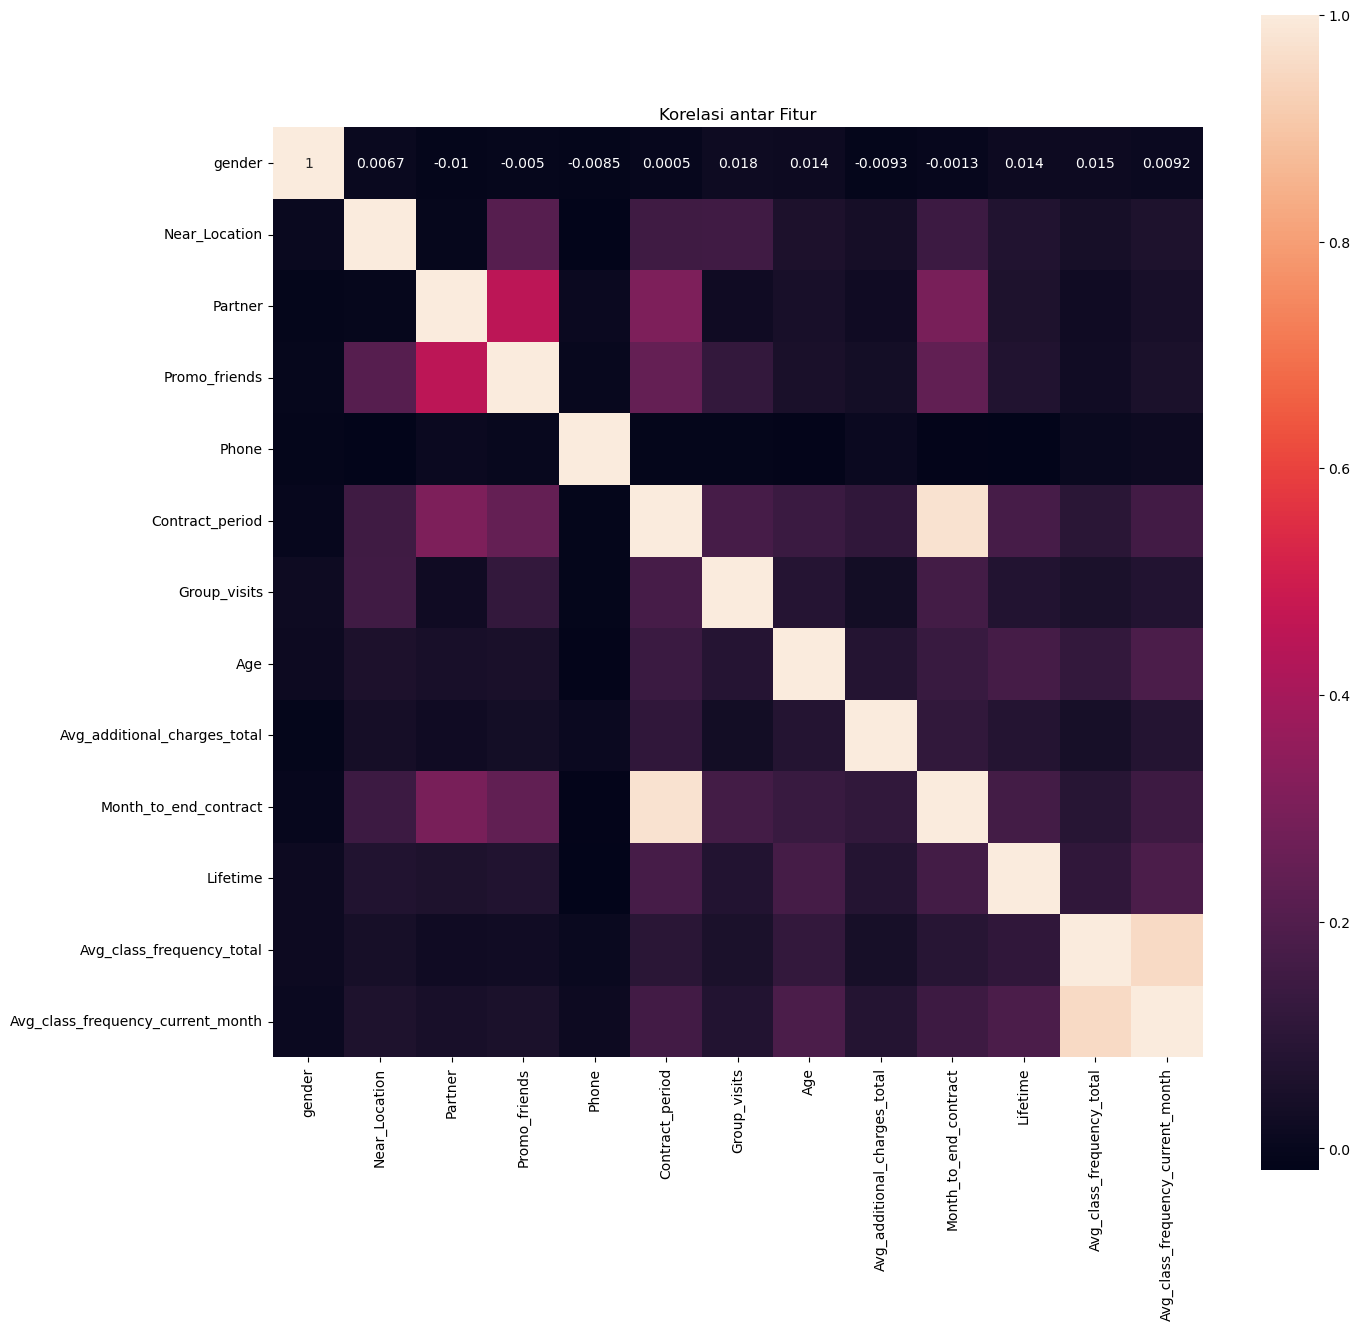

In [16]:
plt.figure(figsize=(15,15))
plt.title('Korelasi antar Fitur')
sns.heatmap(korelasi, annot=True, square=True)


Fitur dengan banyak korelasi positifnya adalah fitur `Partner` dan `Contract period`.

Mari sekarang lihat rata-ratanya

In [17]:
df.groupby('Churn')[df.columns].mean().drop('Churn', axis=1)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Kesimpulan**


Secara sekilah, dilihat bahwa faktor paling besar yang menyebabkan banyak pelanggan bertahan adalah adanya teman

## Memprediksi Churn Pengguna

Terdapat beberapa kesimpulan yang didapat dari analisa sebelumnya,
1. Data tidak memiliki time series, yang berarti pelatihan model prediksi dapat menggunakan metode acak.
2. Karena Churn terdiri dari dua jawaban, iya (1) atau tidak (0) maka prediksi akan dilakukan menggunakan Klasifikasi Biner seperti regresi logistik dan klasifikasi biner lainnya.

In [18]:
X = df.drop('Churn', axis= 1)
y = df['Churn']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 0)

Buat datanya standar dulu

In [20]:
model = [LogisticRegression(max_iter=9000), RandomForestClassifier()]
for mod in model:
    print('Model:',mod)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)

    print('Accuracy: {:.2f}'.format(accuracy_score(y_test,predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test,predictions)))
    print('Recall: {:.2f}'.format((recall_score(y_test,predictions))))
    print('F1: {:.2f}'.format(f1_score(y_test,predictions)))
    print(' ')

Model: LogisticRegression(max_iter=9000)
Accuracy: 0.92
Precision: 0.86
Recall: 0.83
F1: 0.84
 
Model: RandomForestClassifier()
Accuracy: 0.91
Precision: 0.84
Recall: 0.80
F1: 0.82
 


Setelah dilatih, model Regresi Logistik Lebih akurat dan bagus daripada model Random Forest, dengan kata lain disini kita menggunakan model tersebut untuk memprediksi Churn pelanggan.

**Kesimpulan**

Jika dilihat dari model yang digunakan, Logistic Regression unggul pada akurasi, presisi, recall, dan F1.

## Klusterisasi Pelanggan

Pertama-tama akan digunakan dendrogram untuk mencari nilai K yang baik.

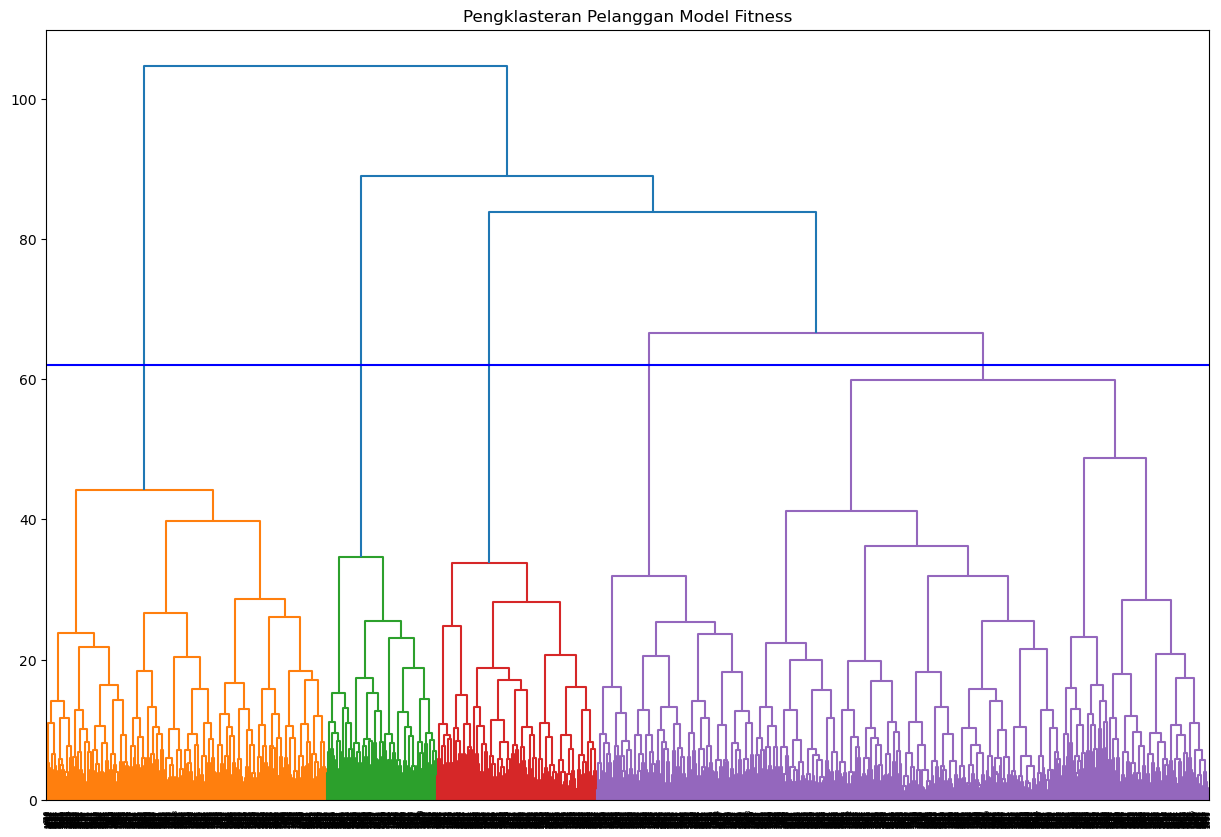

In [21]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.axhline(y = 62, color = 'b', linestyle = '-') 
plt.title('Pengklasteran Pelanggan Model Fitness')
plt.show()

Nilai K yang terbaik antara 6 atau 5, disini akan dipilih nilai 5. (Tidak terlalu ramai)

In [22]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)

df['labels'] = labels
df.groupby('labels').mean()

C:\Users\User_Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
labels,,,,,,,,,,,,,,
0,0.480800,0.723200,0.295200,0.013600,1.0,1.913600,0.276000,28.112800,129.729916,1.820000,2.208000,1.246720,0.992866,0.564000
1,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
2,0.567164,0.847302,0.276693,0.066590,1.0,2.670494,0.445465,30.030999,160.403350,2.474168,4.810563,2.787008,2.779549,0.083812
3,0.499423,0.936563,0.740484,0.479815,1.0,11.833910,0.547866,29.890427,163.552285,10.791234,4.719723,2.000211,1.992273,0.021915
4,0.496805,0.948882,0.819489,0.998403,1.0,3.039936,0.440895,29.097444,141.273179,2.845048,3.731629,1.725697,1.618826,0.257188


In [23]:
silhouette_score(X_sc, labels)

0.12751914816280424

Untuk ukuran klasterisasi masih terbilang baik karena tidak bernilai negatif

**Kesimpulan**

Berdasarkan grup label yang diberikan, kelompok yang churn biasanya membayar lebih sedikit, dan usianya lebih muda, tidak memiliki teman saat berkunjung / sendiri. Sedangkan untuk grup yang masih aktif bisanya suka bersama teman, dengan kata lain, hal terbaik yang dapat dilakukan perusahaan kebugaran untuk meningkatkan Lifetime dari pelanggannya adalah memberikan keringanan jika bersama dengan teman yang diperbanyak, dan usahakan lebih mementingkan banyaknya grup yang datang karena sepertinya pelanggan lebih menikmati kunjungannya jika dilakukan bersama-sama. Selain itu, ternyata periode kontrak yang dilakukan juga berpengaruh, semakin lama, semakin tidak mungkin untuk churn.

## Simpulan

1. Karena tidak adanya data time series, maka dapat digunakan metode split acak untuk traning data dan validation datanya.
2. Karena hanya mencari churn atau tidak, maka digunakan metode klasifikasi biner seperti regresi logistik dan random forest.
3. Setelah dibandingkan, metode regresi logistik lebih akurat memprediksi hasil.
4. Setelah dikelompokkan, didapat bahwa kelompok yang churn biasanya membayar lebih sedikit, dan usianya lebih muda, dan tidak memiliki teman saat berkunjung / sendiri.
5. Periode yang lama juga menandakan pengguna akan bertahan lama juga.
6. Kemungkinan yang dapat dilakukan adalah memperbanyak promo dengan teman atau juga memberikan diskon agar membeli kontrak yang lama bisa menjadi lebih murah dan mudah.